In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report)

In [2]:
pd.set_option('display.max_rows', 200)

In [3]:
def get_max_emotion_score_df(file, emotion_col, emotion_count_col):
    df = pd.read_csv(file)
    df[emotion_col] = df[['joy','sadness','anger','fear']].idxmax(axis=1)
    df[emotion_count_col] = df[emotion_col].groupby(df[emotion_col]).transform(emotion_count_col)
    return df

In [4]:
def display_bar_chart(df, emotion_col, emotion_count_col):
    emotions = df[emotion_col].unique()
    emotions_count = []
    for emotion in emotions:
        emotions_count.append(df[df[emotion_col]==emotion][:1][emotion_count_col].item())
    # for emotion, count in zip(emotions, emotions_count):
    #    print(f"{emotion}: {count}")
    data_tuples = list(zip(emotions, emotions_count))
    df = pd.DataFrame(data_tuples, columns=['emotions','count'])
    plt.figure(figsize=(10,5))
    g = sns.barplot(x='emotions', y='count', data=df.sort_values('emotions'))

## Original Dataset

In [6]:
og_df = pd.read_csv("results/t2e_christmas_carol_by_charles_dickens.csv")
og_df["count"] = og_df["emotions"].groupby(og_df["emotions"]).transform("count")
og_df.head()

,text,emotions,count
0,There is no doubt whatever about that.,fear,390
1,The register of his burial was signed by the c...,fear,390
2,And Scrooge's name was good upon 'Change for a...,joy,220
3,"I don't mean to say that I know, of my own kno...",sadness,397
4,"I might have been inclined, myself, to regard ...",joy,220


In [7]:
og_df = og_df.loc[og_df['emotions'] != "surprise"]

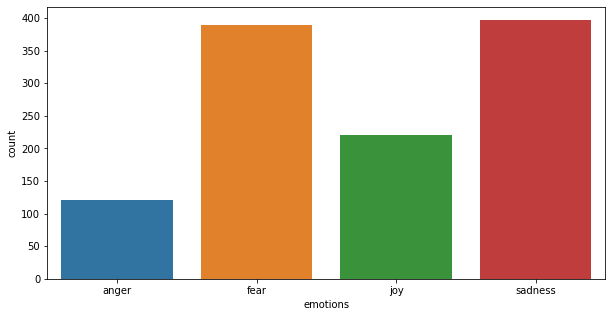

In [8]:
display_bar_chart(og_df, emotion_col="emotions", emotion_count_col="count")

## Predicted Dataset

In [9]:
df = pd.read_csv("results/detected_emotions_christmas_carol_by_charles_dickens_040421_225852.csv")
df.head()

,text,joy,sadness,anger,fear
0,There is no doubt whatever about that.,0.116,0.500,0.052,0.062
1,The register of his burial was signed by the c...,0.497,0.691,0.922,0.345
2,And Scrooge's name was good upon 'Change for a...,0.367,0.772,0.518,0.244
3,"I don't mean to say that I know, of my own kno...",0.243,0.489,0.378,0.172
4,"I might have been inclined, myself, to regard ...",0.542,0.152,0.374,0.349


In [10]:
pred_df = get_max_emotion_score_df(file="results/detected_emotions_christmas_carol_by_charles_dickens_040421_225852.csv",
                             emotion_col="emotions",
                             emotion_count_col="count")
pred_df.head()

,text,joy,sadness,anger,fear,emotions,count
0,There is no doubt whatever about that.,0.116,0.500,0.052,0.062,sadness,334
1,The register of his burial was signed by the c...,0.497,0.691,0.922,0.345,anger,522
2,And Scrooge's name was good upon 'Change for a...,0.367,0.772,0.518,0.244,sadness,334
3,"I don't mean to say that I know, of my own kno...",0.243,0.489,0.378,0.172,sadness,334
4,"I might have been inclined, myself, to regard ...",0.542,0.152,0.374,0.349,joy,215


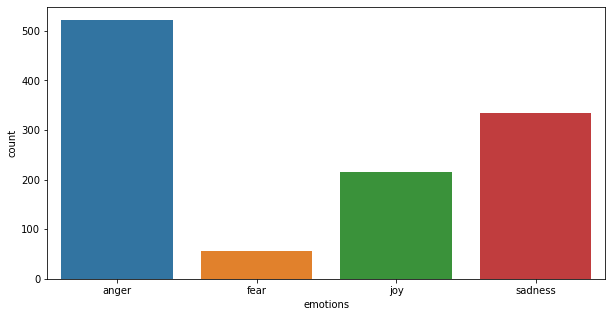

In [11]:
display_bar_chart(pred_df, emotion_col="emotions", emotion_count_col="count")

### Categorize Emotions column (Original dataset)

In [12]:
og_df.dtypes

text        object
emotions    object
count        int64
dtype: object

In [13]:
og_df["emotions"] = og_df["emotions"].astype('category')

In [14]:
category_dict = dict(sorted(zip(og_df.emotions.cat.codes, og_df.emotions)))

In [15]:
for k, v in category_dict.items(): print(k, v)

0 anger
1 fear
2 joy
3 sadness


In [16]:
og_df.dtypes

text          object
emotions    category
count          int64
dtype: object

In [17]:
og_df["emotions_cat"] = og_df["emotions"].cat.codes
og_df.head()

,text,emotions,count,emotions_cat
0,There is no doubt whatever about that.,fear,390,1
1,The register of his burial was signed by the c...,fear,390,1
2,And Scrooge's name was good upon 'Change for a...,joy,220,2
3,"I don't mean to say that I know, of my own kno...",sadness,397,3
4,"I might have been inclined, myself, to regard ...",joy,220,2


### Categorize Emotions column (Predicted dataset)

In [18]:
pred_df.dtypes

text         object
joy         float64
sadness     float64
anger       float64
fear        float64
emotions     object
count         int64
dtype: object

In [19]:
pred_df["emotions"] = pred_df["emotions"].astype('category')

In [20]:
category_dict = dict(sorted(zip(pred_df.emotions.cat.codes, pred_df.emotions)))

In [21]:
for k, v in category_dict.items(): print(k, v)

0 anger
1 fear
2 joy
3 sadness


In [22]:
pred_df.dtypes

text          object
joy          float64
sadness      float64
anger        float64
fear         float64
emotions    category
count          int64
dtype: object

In [23]:
pred_df["emotions_cat"] = pred_df["emotions"].cat.codes
pred_df.head()

,text,joy,sadness,anger,fear,emotions,count,emotions_cat
0,There is no doubt whatever about that.,0.116,0.500,0.052,0.062,sadness,334,3
1,The register of his burial was signed by the c...,0.497,0.691,0.922,0.345,anger,522,0
2,And Scrooge's name was good upon 'Change for a...,0.367,0.772,0.518,0.244,sadness,334,3
3,"I don't mean to say that I know, of my own kno...",0.243,0.489,0.378,0.172,sadness,334,3
4,"I might have been inclined, myself, to regard ...",0.542,0.152,0.374,0.349,joy,215,2


In [24]:
og_df.head()

,text,emotions,count,emotions_cat
0,There is no doubt whatever about that.,fear,390,1
1,The register of his burial was signed by the c...,fear,390,1
2,And Scrooge's name was good upon 'Change for a...,joy,220,2
3,"I don't mean to say that I know, of my own kno...",sadness,397,3
4,"I might have been inclined, myself, to regard ...",joy,220,2


In [25]:
pred_df.head()

,text,joy,sadness,anger,fear,emotions,count,emotions_cat
0,There is no doubt whatever about that.,0.116,0.500,0.052,0.062,sadness,334,3
1,The register of his burial was signed by the c...,0.497,0.691,0.922,0.345,anger,522,0
2,And Scrooge's name was good upon 'Change for a...,0.367,0.772,0.518,0.244,sadness,334,3
3,"I don't mean to say that I know, of my own kno...",0.243,0.489,0.378,0.172,sadness,334,3
4,"I might have been inclined, myself, to regard ...",0.542,0.152,0.374,0.349,joy,215,2


## Confusion Matrix

In [26]:
confusion = confusion_matrix(og_df["emotions_cat"], pred_df["emotions_cat"])

In [27]:
confusion

array([[ 55,   7,  27,  32],
       [170,  26,  73, 121],
       [103,   5,  38,  74],
       [194,  19,  77, 107]], dtype=int64)

In [28]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    """
    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix
    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']
    title:        the text to display at the top of the matrix
    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues
    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix by sklearn.metrics.confusion_matrix 
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10, 7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(
        accuracy, misclass))
    plt.show()

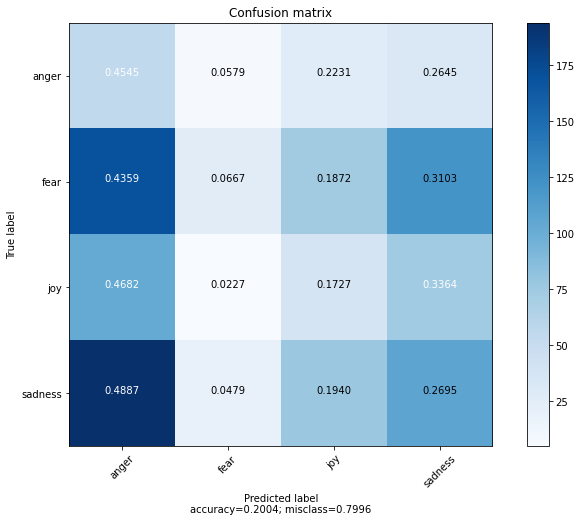

In [29]:
target_names = []
for k, v in category_dict.items(): target_names.append(v)
plot_confusion_matrix(cm=confusion, target_names=target_names, title='Confusion matrix')

### Precision-Recall Report
<div>
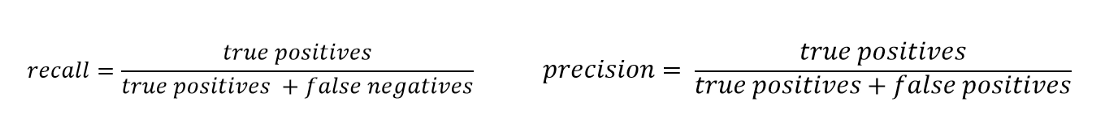
</div>

In [30]:
classes = []
for k, v in category_dict.items(): classes.append(v)
classes

['anger', 'fear', 'joy', 'sadness']

In [31]:
print(classification_report(og_df["emotions_cat"], pred_df["emotions_cat"], target_names=classes))

              precision    recall  f1-score   support

       anger       0.11      0.45      0.17       121
        fear       0.46      0.07      0.12       390
         joy       0.18      0.17      0.17       220
     sadness       0.32      0.27      0.29       397

    accuracy                           0.20      1128
   macro avg       0.26      0.24      0.19      1128
weighted avg       0.32      0.20      0.20      1128

